In [18]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Loading  the Datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')
# Check the first few rows of each dataset
print(customers.head())
print(products.head())
print(transactions.head())
print("----------------------------")
print("----------------------------")



# Check data types, missing values, and overall structure
print(customers.info())
print(products.info())
print(transactions.info())
print("----------------------------")
print("----------------------------")

# check for duplicates
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

print("----------------------------")
print("----------------------------")
#check for null values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())
print("----------------------------")
print("----------------------------")
print(customers.describe())
print(products.describe())
print(transactions.describe())

print("----------------------------")
print("----------------------------")
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [20]:
# Merge transactions with customers
merged_df = pd.merge(transactions, customers, on='CustomerID', how='left')

# Merge with products
merged_df = pd.merge(merged_df, products, on='ProductID', how='left')

# Inspect the merged data
print(merged_df.head())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

In [24]:
print(merged_df.describe())

                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              2023-07-23 00:00:00   299

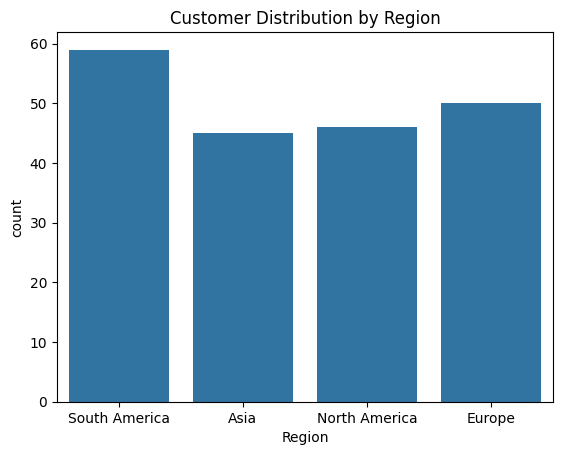

In [13]:
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.show()

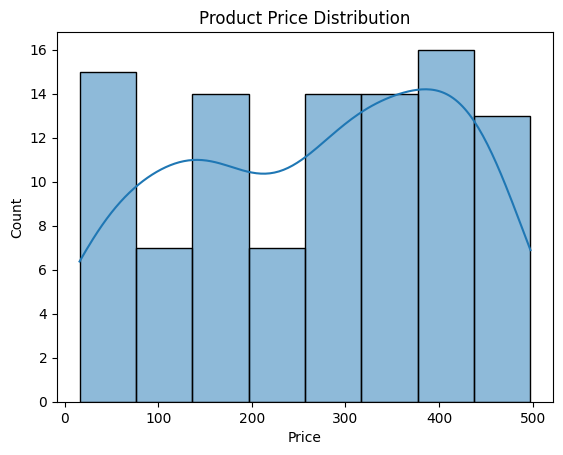

In [14]:
sns.histplot(products['Price'], kde=True)
plt.title('Product Price Distribution')
plt.show()

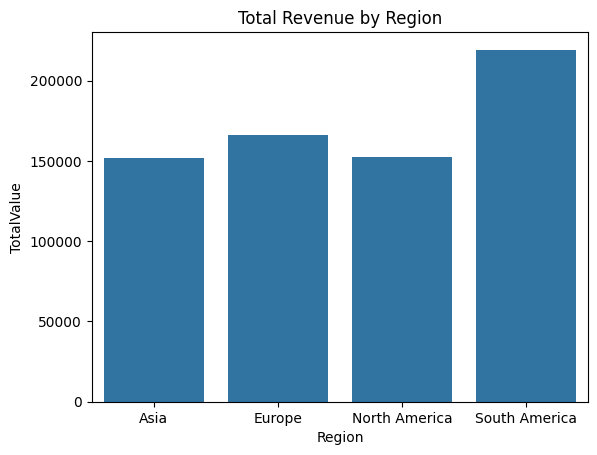

In [27]:
revenue_by_region = merged_df.groupby('Region')['TotalValue'].sum().reset_index()
sns.barplot(data=revenue_by_region, x='Region', y='TotalValue')
plt.title('Total Revenue by Region')
plt.show()

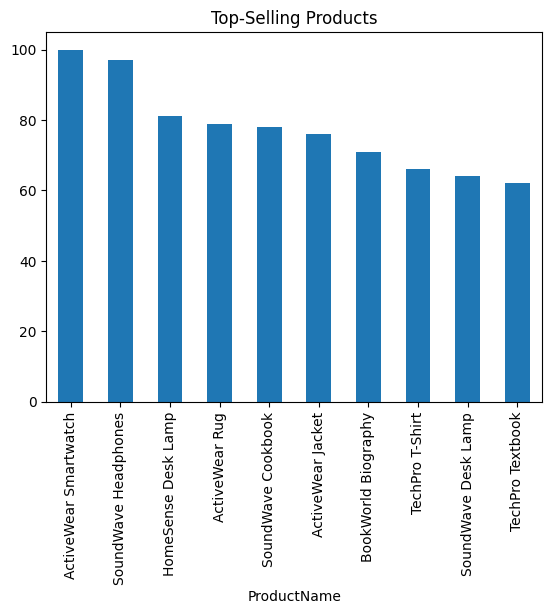

In [28]:
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top-Selling Products')
plt.show()

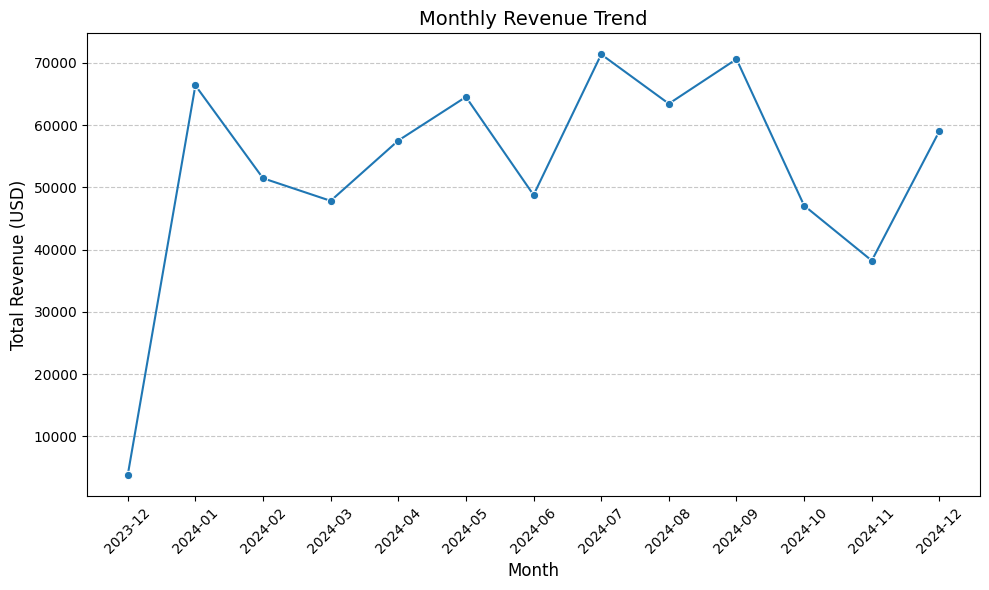

In [30]:
# Ensure 'TransactionDate' is in datetime format
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'], errors='coerce')

# Extract Year-Month from 'TransactionDate'
merged_df['YearMonth'] = merged_df['TransactionDate'].dt.to_period('M').astype(str)

# Group data by 'YearMonth' and calculate total revenue
monthly_revenue = merged_df.groupby('YearMonth')['TotalValue'].sum().reset_index()

# Sort the data by 'YearMonth' for proper plotting
monthly_revenue = monthly_revenue.sort_values('YearMonth')

# Plot the monthly revenue trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_revenue, x='YearMonth', y='TotalValue', marker='o')
plt.title('Monthly Revenue Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
